# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#7b6b59;overflow:hidden">Predictor</div>


- Load your model & vectorizer
- Use model to predict

Overall accuracy model:
Accuracy  = 92.21%
Precision = 92.31%
Recall    = 92.21%
F1-score  = 92.22%

Accuracy model for each label:
Algebra       = 89.19%
Combinatorics = 95.33%
Geometry      = 96.64%
Number Theory = 88.15%


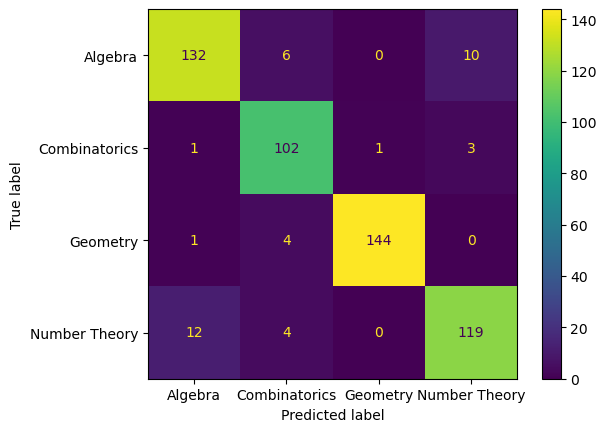

In [1]:
import pandas as pd
import pickle

def load_pkl(name: str):
    if len(name) == 0:
        raise ValueError("Filename cannot be empty")

    with open(name, 'rb') as file:
        return pickle.load(file)

def model_information(model, X_test, y_test):
    import numpy as np
    import matplotlib.pyplot as plt
    
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import precision_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import f1_score
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print("Overall accuracy model:")
    print(f"Accuracy  = {accuracy*100:<.2f}%")
    print(f"Precision = {precision*100:<.2f}%")
    print(f"Recall    = {recall*100:<.2f}%")
    print(f"F1-score  = {f1*100:<.2f}%\n")
    
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

    heatmap = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    labels = np.unique(y_test)

    print("Accuracy model for each label:")
    for label in labels:
        idx = np.where(model.classes_ == label)[0][0]
        label_accuracy = cm[idx, idx] / np.sum(cm[idx, :])
        print(f"{label:<14s}= {label_accuracy*100:.2f}%")

    heatmap.plot()
    plt.show()
    
# Read dataset
df = pd.read_csv('imo.csv')
# df_isnull = df[df['label'].isnull()]
# df_isnull.reset_index(drop=True, inplace=True)

model = load_pkl('SVC_92_accuracy/SVC_.pkl')
vectorizer = load_pkl('SVC_92_accuracy/vectorizer.pkl')

model_information(model, load_pkl('SVC_92_accuracy/X_test.pkl'), load_pkl('SVC_92_accuracy/y_test.pkl'))


In [2]:
while True:
    x = int(input("id_key: "))
    teks_soal = df[df['id_key'] == x].iloc[0, :].post_canonical
    print(f"{x}. {teks_soal}")

    # PREDICT HERE
    sample = [str(teks_soal)]
    processed = vectorizer.transform(sample)
    pred = model.predict_proba(processed)

    class_labels = model.classes_
    class_probabilities = {class_labels[i]: pred[0][i] * 100 for i in range(len(class_labels))}
    # print(class_probabilities)

    sorted_class_probabilities = {label: class_probabilities[label] for label in ['Algebra', 'Combinatorics', 'Geometry', 'Number Theory']}
    # print(sorted_class_probabilities)

    for label, prob in zip(class_labels, pred[0]):
        print(f"{label:<14s}= {prob*100:.2f}%")
    print()
    

6666. Prove that among all possible triangles whose vertices are $3,5$ and $7$ apart from a given point $P$, the ones with the largest perimeter have $P$ as incentre.
Algebra       = 2.91%
Combinatorics = 41.45%
Geometry      = 53.96%
Number Theory = 1.67%



ValueError: invalid literal for int() with base 10: ''